In [12]:
import random
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
%run ./func.ipynb

In [14]:
D, J = 100,100

# a side of the site
num_rows_columns = 50

alpha = 0
beta = 0.01

p = 2
r = 2

h_i = np.full(D, 1 / D)

# 既存のリーダーの施設セット J_L を仮定
J_L = {}  # インデックスとして候補施設の一部を選択
J_F = {}

In [15]:
fix_seed = False
eta = 0.01
mu = 0.03

max_iter = 1_0
tau_interval = 10000

In [16]:
x_Relaxed_mutation, y_Relaxed_mutation, obj_final_relaxed_mutation, x_proj_mutation, y_proj_mutation, obj_final_binary_mutation, obj_final_ex_mutation, candidate_sites_mutation, demand_points_mutation, seed_mutation, history_mutation= lgda_solver(
    D,J,num_rows_columns,
    p, r,
    alpha,beta,h_i,J_L, J_F,
    eta_x=eta, eta_y=eta, eta_lambda=eta,
    mu=mu,
    max_iter=max_iter,
    tau_interval=tau_interval,
    return_history=True,
    fix_seed = fix_seed,
    seed = 420
)

1971505641


In [17]:
def save_history_npz(history: dict, out_path: str):
    out_path = str(out_path)
    # dictの各要素がnumpy配列なのでそのまま保存できる
    np.savez(out_path, **history)

# 例: seed をファイル名に入れると管理が楽
save_history_npz(history_mutation, f"history/history_seed_{seed_mutation}_eta_{eta}_mu_{mu}_iter_{max_iter}_tau_{tau_interval}.npz")

In [18]:
print("\nOptimal x:", x_proj_mutation)
print("Optimal y:", y_proj_mutation)
print("\nOptimal real x:", x_Relaxed_mutation)
print("Optimal real y:", y_Relaxed_mutation)

print("\nObjective (Relaxed):", obj_final_relaxed_mutation)
print("Objective (Binary):", obj_final_binary_mutation)
# print("\nHistory of dx:", history["dx"])
# print('objective:', history["objective"][-1])
# print("num of iter:", len(history["objective"]))


Optimal x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Optimal y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0.]

Optimal real x: [4.33170882e-04 2.01898885e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.14335634e-04 2.25477558e-04 0.00000000e+00 2.22390827e-04
 3.26292259e-04 1.54651824e-01 4.12050675e-04 8.51316414e-05
 0.00000000e+00 1.51686838e-01 4.10537893e-04 0.00000000e+00
 7.38620025e-05 4.24129319e-04 5.94843891e-

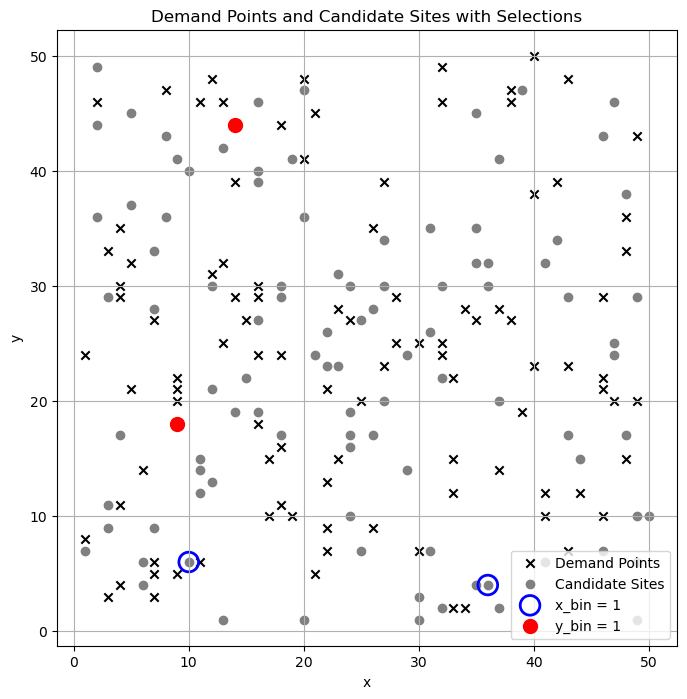

In [19]:
#plot_minmax_history(history["objective"], history["dx"], history["dy"], logy=True)

plot_facility_selection(candidate_sites_mutation, demand_points_mutation, x_proj_mutation, y_proj_mutation)

In [20]:
n = tau_interval * 3

save pic: fig/lgda_exp1_seed_1971505641_eta_0.01_mu_0.03_iter_10_tau_10000_30000_objective.png


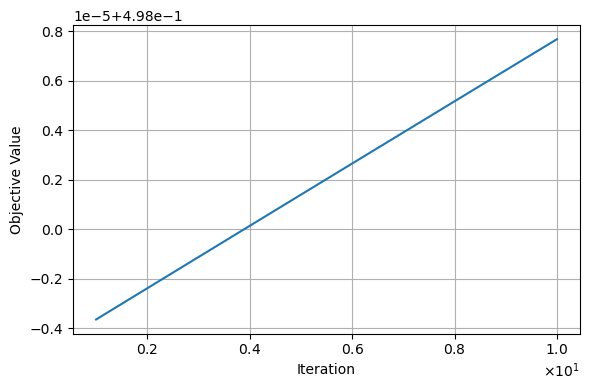

save pic: fig/lgda_exp1_seed_1971505641_eta_0.01_mu_0.03_iter_10_tau_10000_30000_dx.png


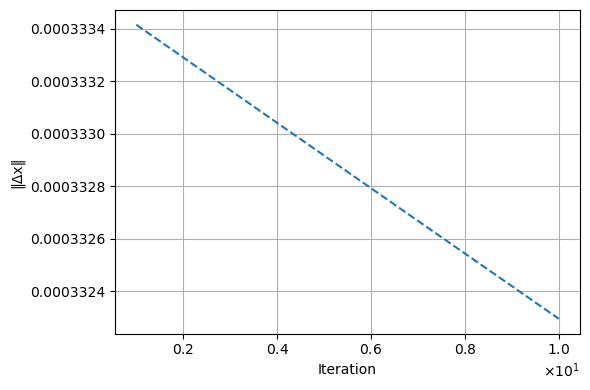

save pic: fig/lgda_exp1_seed_1971505641_eta_0.01_mu_0.03_iter_10_tau_10000_30000_dy.png


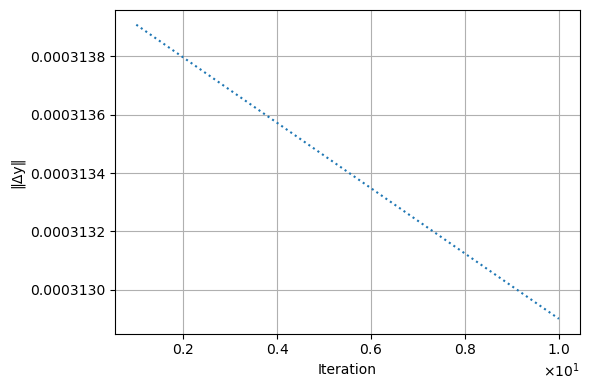

save pic: fig/lgda_exp1_seed_1971505641_eta_0.01_mu_0.03_iter_10_tau_10000_30000_lambda_summary.png


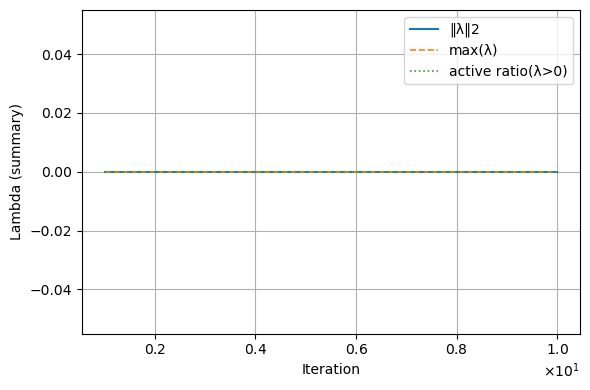

save pic: fig/lgda_exp1_seed_1971505641_eta_0.01_mu_0.03_iter_10_tau_10000_30000_violation.png


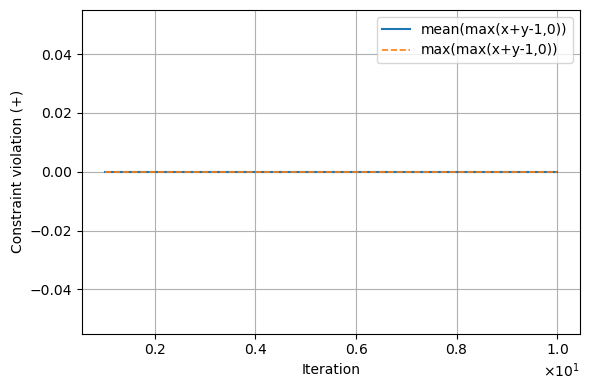

In [21]:
def safe_slice_history(history, n):
    if n is None:
        return history

    if isinstance(history, dict):
        sliced = {}
        for k, v in history.items():
            try:
                sliced[k] = v[:n]
            except Exception:
                sliced[k] = v
        return sliced

    # list / np.array / pandas series など
    try:
        return history[:n]
    except Exception:
        return history

sliced_history = safe_slice_history(history_mutation, n)

plot_each_history_component_separately(
    sliced_history,
    logy=False,
    fix_seed=False,          # ランダムに実験したいなら False（固定したいなら True）
    save=True,
    save_prefix=f"fig/lgda_exp1_seed_{seed_mutation}_eta_{eta}_mu_{mu}_iter_{max_iter}_tau_{tau_interval}_{n}",   # lgda_exp1_1000_objective.png など
    save_ext="png",
)

save pic: fig/lgda_exp1_seed_1971505641_eta_0.01_mu_0.03_iter_10_tau_10000_until_10_objective.png


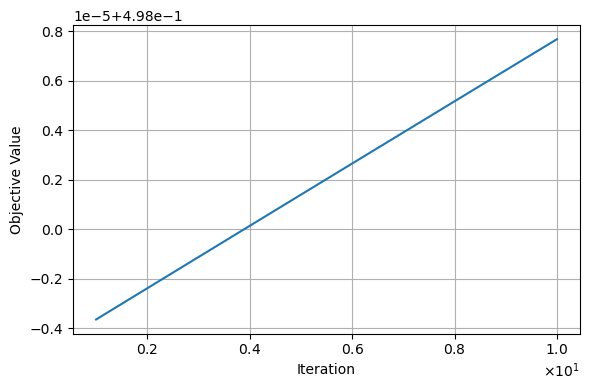

save pic: fig/lgda_exp1_seed_1971505641_eta_0.01_mu_0.03_iter_10_tau_10000_until_10_dx.png


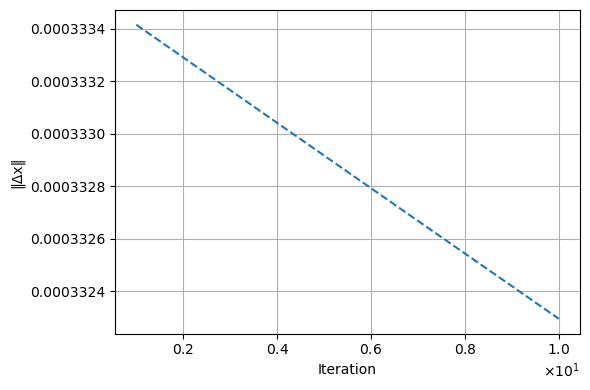

save pic: fig/lgda_exp1_seed_1971505641_eta_0.01_mu_0.03_iter_10_tau_10000_until_10_dy.png


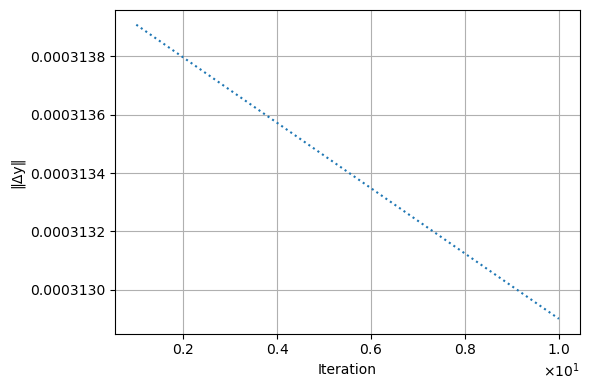

save pic: fig/lgda_exp1_seed_1971505641_eta_0.01_mu_0.03_iter_10_tau_10000_until_10_lambda_summary.png


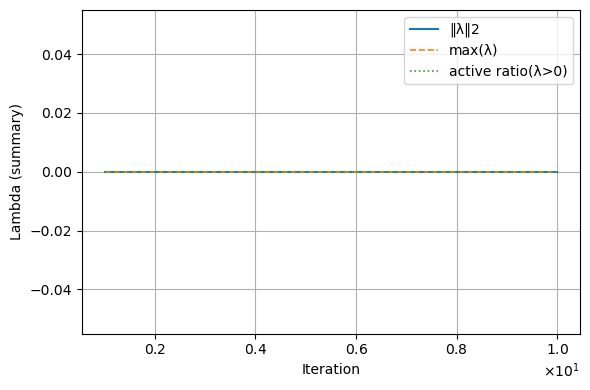

save pic: fig/lgda_exp1_seed_1971505641_eta_0.01_mu_0.03_iter_10_tau_10000_until_10_violation.png


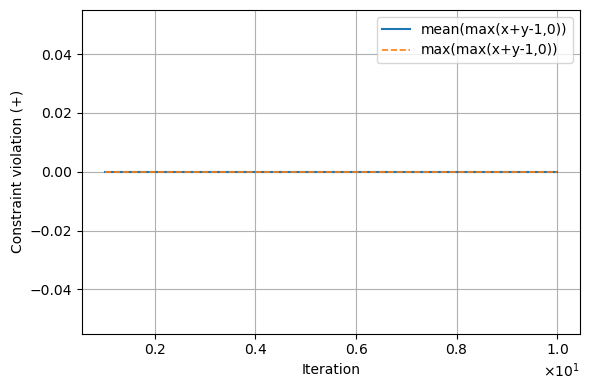

In [22]:
plot_each_history_component_separately(
    history_mutation,
    logy=False,
    fix_seed=False,          # ランダムに実験したいなら False（固定したいなら True）
    save=True,
    save_prefix=f"fig/lgda_exp1_seed_{seed_mutation}_eta_{eta}_mu_{mu}_iter_{max_iter}_tau_{tau_interval}_until_{max_iter}",   # lgda_exp1_1000_objective.png など
    save_ext="png",
)